In [1]:
import os
from dotenv import load_dotenv

load_dotenv()
INDOX_API_KEY = os.getenv("INDOX_API_KEY")

In [2]:
from indoxJudge import UniversalEvaluator
from indoxJudge.models import IndoxApi


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "E:\Codes\IndoxJudge\indoxJudge\.venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "E:\Codes\IndoxJudge\indoxJudge\.venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "E:\Codes\IndoxJudge\indoxJudge\.venv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "E:

In [3]:
model = IndoxApi(api_key=INDOX_API_KEY)

In [4]:
query = "What are the benefits of a Mediterranean diet?"
retrieval_context = [
    "The Mediterranean diet emphasizes eating primarily plant-based foods, such as fruits and vegetables, whole grains, legumes, and nuts. It also includes moderate amounts of fish and poultry, and low consumption of red meat. Olive oil is the main source of fat, providing monounsaturated fats which are beneficial for heart health.",
    "Research has shown that the Mediterranean diet can reduce the risk of heart disease, stroke, and type 2 diabetes. It is also associated with improved cognitive function and a lower risk of Alzheimer's disease. The diet's high content of fiber, antioxidants, and healthy fats contributes to its numerous health benefits.",
    "A Mediterranean diet has been linked to a longer lifespan and a reduced risk of chronic diseases. It promotes healthy aging and weight management due to its emphasis on whole, unprocessed foods and balanced nutrition."]
response = "The Mediterranean diet is known for its health benefits, including reducing the risk of heart disease, stroke, and diabetes. It encourages the consumption of fruits, vegetables, whole grains, nuts, and olive oil, while limiting red meat. Additionally, this diet has been associated with better cognitive function and a reduced risk of Alzheimer's disease, promoting longevity and overall well-being."

In [5]:
evaluator = UniversalEvaluator(model=model, query=query, retrieval_context=retrieval_context, llm_response=response)

INFO: Evaluator initialized with model and metrics.
INFO: Model set for all metrics.


In [6]:
result = evaluator.judge()

INFO: Evaluating metric: Faithfulness
INFO: Completed evaluation for metric: Faithfulness
INFO: Evaluating metric: AnswerRelevancy
INFO: Completed evaluation for metric: AnswerRelevancy
INFO: Evaluating metric: Bias
INFO: Completed evaluation for metric: Bias
INFO: Evaluating metric: ContextualRelevancy
INFO: Completed evaluation for metric: ContextualRelevancy
INFO: Evaluating metric: GEval
INFO: Completed evaluation for metric: GEval
INFO: Evaluating metric: Hallucination
INFO: Completed evaluation for metric: Hallucination
INFO: Evaluating metric: KnowledgeRetention
INFO: Completed evaluation for metric: KnowledgeRetention
INFO: Evaluating metric: Toxicity
INFO: Completed evaluation for metric: Toxicity


In [7]:
print(f"Result Of Evaluation:\n{result}")

Result Of Evaluation:
{'faithfulness': {'claims': ['The Mediterranean diet is known for its health benefits.', 'The Mediterranean diet reduces the risk of heart disease.', 'The Mediterranean diet reduces the risk of stroke.', 'The Mediterranean diet reduces the risk of diabetes.', 'The Mediterranean diet encourages the consumption of fruits.', 'The Mediterranean diet encourages the consumption of vegetables.', 'The Mediterranean diet encourages the consumption of whole grains.', 'The Mediterranean diet encourages the consumption of nuts.', 'The Mediterranean diet encourages the consumption of olive oil.', 'The Mediterranean diet limits red meat consumption.', 'The Mediterranean diet is associated with better cognitive function.', "The Mediterranean diet is associated with a reduced risk of Alzheimer's disease.", 'The Mediterranean diet promotes longevity.', 'The Mediterranean diet promotes overall well-being.'], 'truths': ['The Mediterranean diet is known for its health benefits.', 'Th

In [8]:
evaluator.score

{'faithfulness': 1.0,
 'answer_relevancy': 1.0,
 'bias': 0.0,
 'contextual_relevancy': 1.0,
 'geval': 1.0,
 'hallucination': 0.0,
 'knowledge_retention': 0.0,
 'toxicity': 0.0}

In [9]:
evaluator.weighted_scores

{}

In [10]:
evaluator.plot_metrics()

{'faithfulness': 0.2, 'answer_relevancy': 0.15, 'bias': 0.1, 'contextual_relevancy': 0.2, 'geval': 0.1, 'hallucination': 0.05, 'knowledge_retention': 0.0, 'toxicity': 0.05}


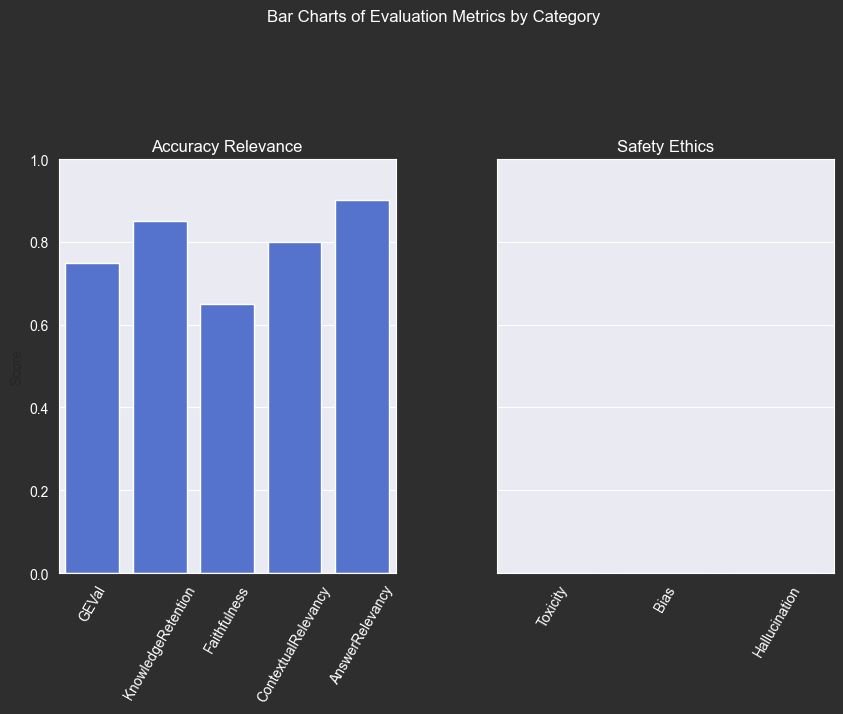

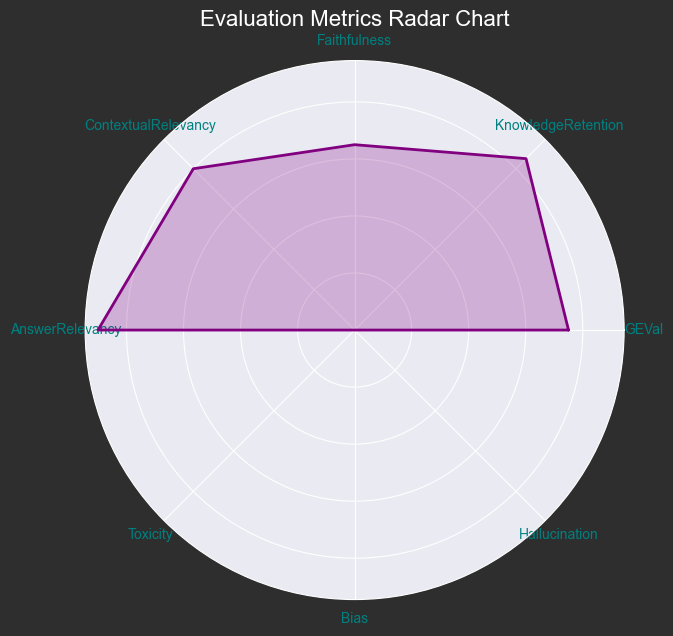

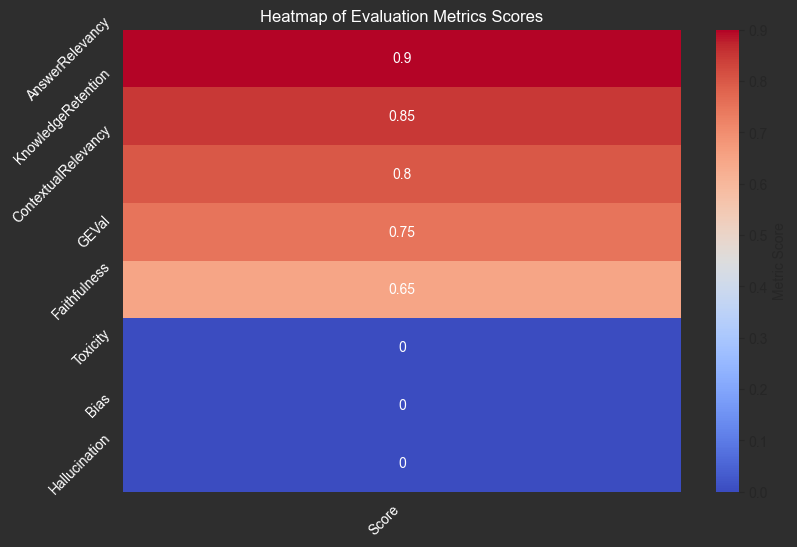

In [3]:
import urllib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from io import BytesIO
import base64
from IPython.display import HTML
import ipywidgets as widgets
from IPython.display import display

# Set seaborn style for dark mode
sns.set_style("darkgrid")


class MetricVisualizer:
    def __init__(self, scores_dic):
        self.scores_dic = scores_dic
        self.metric_categories = {
            'accuracy_relevance': [
                'GEVal',
                'KnowledgeRetention',
                'Faithfulness',
                'ContextualRelevancy',
                'AnswerRelevancy'
            ],
            'safety_ethics': [
                'Toxicity',
                'Bias',
                'Hallucination'
            ],
        }
        self.colors = {
            'accuracy_relevance': 'royalblue',
            'safety_ethics': 'darkred',
        }
        self.hatches = {
            'safety_ethics': '//'
        }
        self.df = self.create_dataframe()

    def create_dataframe(self):
        data = [
            (metric, score, category)
            for category, metrics in self.metric_categories.items()
            for metric, score in self.scores_dic.items()
            if metric in metrics
        ]
        return pd.DataFrame(data, columns=['Metric', 'Score', 'Category'])

    def plot_to_html(self, fig):
        """Convert a Matplotlib figure to HTML image without displaying it."""
        buf = BytesIO()
        fig.savefig(buf, format='png')
        buf.seek(0)
        string = base64.b64encode(buf.read()).decode('utf-8')
        uri = 'data:image/png;base64,' + urllib.parse.quote(string)
        plt.close(fig)
        return f'<img src="{uri}" style="height: 550px;">'

    def plot_bar_charts(self):
        fig, axes = plt.subplots(1, len(self.metric_categories), figsize=(10, 6), sharey=True)
        for i, (category, group) in enumerate(self.df.groupby('Category')):
            sns.barplot(x='Metric', y='Score', data=group, ax=axes[i], color=self.colors[category],
                        hatch=self.hatches.get(category, None))
            axes[i].set_title(category.replace('_', ' ').title(), color='white')
            axes[i].set_ylim(0, 1)
            axes[i].tick_params(axis='x', rotation=60, colors='white')
            axes[i].tick_params(axis='y', colors='white')
            axes[i].set_xlabel('', color='white')
        plt.suptitle('Bar Charts of Evaluation Metrics by Category', y=1.05, color='white')
        plt.subplots_adjust(top=0.8, hspace=0.3, wspace=0.3)
        fig.patch.set_facecolor('#2e2e2e')
        return self.plot_to_html(fig)

    def plot_radar_chart(self):
        labels = list(self.scores_dic.keys())
        values = list(self.scores_dic.values())
        num_vars = len(labels)
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
        values += values[:1]
        angles += angles[:1]
        fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
        ax.fill(angles, values, color='purple', alpha=0.25)
        ax.plot(angles, values, color='purple', linewidth=2)
        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels, fontsize=10, color='teal', )
        plt.title('Evaluation Metrics Radar Chart', size=16, color='white')
        fig.patch.set_facecolor('#2e2e2e')
        return self.plot_to_html(fig)

    def plot_heatmap(self):
        metric_scores_df = pd.DataFrame.from_dict(self.scores_dic, orient='index', columns=['Score'])
        metric_scores_df = metric_scores_df.sort_values(by='Score', ascending=False)

        fig, ax = plt.subplots(figsize=(9, 6))
        sns.heatmap(metric_scores_df, annot=True, cmap='coolwarm', cbar_kws={'label': 'Metric Score'}, ax=ax,
                    annot_kws={"color": "white"})
        plt.title('Heatmap of Evaluation Metrics Scores', color='white')
        plt.yticks(rotation=45, color='white')
        plt.xticks(rotation=45, ha='right', color='white')
        ax.yaxis.label.set_color('white')
        ax.xaxis.label.set_color('white')
        fig.patch.set_facecolor('#2e2e2e')
        return self.plot_to_html(fig)

    def show_all_plots(self):
        bar_chart_html = self.plot_bar_charts()
        radar_chart_html = self.plot_radar_chart()
        heatmap_html = self.plot_heatmap()

        # Define a consistent background color and text style for dark mode
        background_color = '#2e2e2e'
        text_color = 'white'

        # Explanations for each plot
        bar_chart_description = widgets.HTML(
            value="<div style='background-color: {bg_color}; color: {text_color}; height: 550px; padding: 10px;'>"
                  "<p>The bar charts display the scores of various evaluation metrics categorized into "
                  "'accuracy relevance' and 'safety ethics'. Each bar represents a metric, with the height of the bar "
                  "indicating the score value. This visualization allows for a quick comparison of metric scores across different categories.</p>"
                  "</div>".format(bg_color=background_color, text_color=text_color)
        )

        radar_chart_description = widgets.HTML(
            value="<div style='background-color: {bg_color}; color: {text_color}; height: 550px; padding: 10px;'>"
                  "<p>The radar chart provides a comprehensive view of the scores across multiple metrics. "
                  "Each axis represents a metric, and the distance from the center indicates the score value. "
                  "This chart helps in identifying strengths and areas for improvement by comparing scores across different metrics.</p>"
                  "</div>".format(bg_color=background_color, text_color=text_color)
        )

        heatmap_description = widgets.HTML(
            value="<div style='background-color: {bg_color}; color: {text_color}; height: 550px; padding: 10px;'>"
                  "<p>The heatmap shows the scores for various evaluation metrics. Each cell represents the score of a metric, "
                  "with the color indicating the score level. Warmer colors (closer to red) indicate higher scores, while cooler colors "
                  "(closer to blue) indicate lower scores. This visualization helps in identifying strengths and areas for improvement based on the evaluation metrics.</p>"
                  "</div>".format(bg_color=background_color, text_color=text_color)
        )

        # Create HBox for each tab with plot and description
        bar_chart_tab_content = widgets.HBox([widgets.HTML(value=bar_chart_html), bar_chart_description],
                                             layout=widgets.Layout(align_items='stretch', height='550px'))
        radar_chart_tab_content = widgets.HBox([widgets.HTML(value=radar_chart_html), radar_chart_description],
                                               layout=widgets.Layout(align_items='stretch', height='550px'))
        heatmap_tab_content = widgets.HBox([widgets.HTML(value=heatmap_html), heatmap_description],
                                           layout=widgets.Layout(align_items='stretch', height='550px', width='100%'))

        tab_contents = [
            bar_chart_tab_content,
            radar_chart_tab_content,
            heatmap_tab_content
        ]

        tab = widgets.Tab()
        tab.children = tab_contents
        tab.set_title(0, 'Bar Charts')
        tab.set_title(1, 'Radar Chart')
        tab.set_title(2, 'Heatmap')

        display(tab)


# Usage example with sample data
scores_dic = {
    'GEVal': 0.75,
    'KnowledgeRetention': 0.85,
    'Faithfulness': 0.65,
    'ContextualRelevancy': 0.8,
    'AnswerRelevancy': 0.9,
    'Toxicity': 0.0,
    'Bias': 0.0,
    'Hallucination': 0.0
}

visualizer = MetricVisualizer(scores_dic)
visualizer.show_all_plots()


In [12]:
evaluator.weighted_score

{}

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from io import BytesIO
import base64
import urllib
from IPython.display import HTML
import ipywidgets as widgets
from IPython.display import display

# Set seaborn style for dark mode
sns.set_style("darkgrid")


class MetricVisualizer:
    def __init__(self, scores_dic):
        self.scores_dic = scores_dic
        self.metric_categories = {
            'accuracy_relevance': [
                'GEVal',
                'KnowledgeRetention',
                'Faithfulness',
                'ContextualRelevancy',
                'AnswerRelevancy'
            ],
            'safety_ethics': [
                'Toxicity',
                'Bias',
                'Hallucination'
            ],
        }
        self.colors = {
            'accuracy_relevance': 'royalblue',
            'safety_ethics': 'darkred',
        }
        self.hatches = {
            'safety_ethics': '//'
        }
        self.df = self.create_dataframe()

    def create_dataframe(self):
        data = [
            (metric, score, category)
            for category, metrics in self.metric_categories.items()
            for metric, score in self.scores_dic.items()
            if metric in metrics
        ]
        df = pd.DataFrame(data, columns=['Metric', 'Score', 'Category'])
        print(df)  # Debug: Check the DataFrame
        return df

    def plot_to_html(self, fig):
        """Convert a Matplotlib figure to HTML image without displaying it."""
        buf = BytesIO()
        fig.savefig(buf, format='png')
        buf.seek(0)
        string = base64.b64encode(buf.read()).decode('utf-8')
        uri = 'data:image/png;base64,' + urllib.parse.quote(string)
        plt.close(fig)
        return f'<img src="{uri}" style="height: 550px;">'

    def plot_bar_charts(self):
        fig, axes = plt.subplots(1, len(self.metric_categories), figsize=(10, 6), sharey=True)
        for i, (category, group) in enumerate(self.df.groupby('Category')):
            sns.barplot(x='Metric', y='Score', data=group, ax=axes[i], color=self.colors[category],
                        hatch=self.hatches.get(category, None))
            axes[i].set_title(category.replace('_', ' ').title(), color='white')
            axes[i].set_ylim(0, 1)
            axes[i].tick_params(axis='x', rotation=60, colors='white')
            axes[i].tick_params(axis='y', colors='white')
            axes[i].set_xlabel('', color='white')
        plt.suptitle('Bar Charts of Evaluation Metrics by Category', y=1.05, color='white')
        plt.subplots_adjust(top=0.8, hspace=0.3, wspace=0.3)
        fig.patch.set_facecolor('#2e2e2e')
        return self.plot_to_html(fig)

    def plot_radar_chart(self):
        labels = list(self.scores_dic.keys())
        values = list(self.scores_dic.values())
        num_vars = len(labels)
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
        values += values[:1]
        angles += angles[:1]
        fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
        ax.fill(angles, values, color='purple', alpha=0.25)
        ax.plot(angles, values, color='purple', linewidth=2)
        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels, fontsize=10, color='teal', )
        plt.title('Evaluation Metrics Radar Chart', size=16, color='white')
        fig.patch.set_facecolor('#2e2e2e')
        return self.plot_to_html(fig)

    def plot_heatmap(self):
        metric_scores_df = pd.DataFrame.from_dict(self.scores_dic, orient='index', columns=['Score'])
        metric_scores_df = metric_scores_df.sort_values(by='Score', ascending=False)

        fig, ax = plt.subplots(figsize=(9, 6))
        sns.heatmap(metric_scores_df, annot=True, cmap='coolwarm', cbar_kws={'label': 'Metric Score'}, ax=ax,
                    annot_kws={"color": "white"})
        plt.title('Heatmap of Evaluation Metrics Scores', color='white')
        plt.yticks(rotation=45, color='white')
        plt.xticks(rotation=45, ha='right', color='white')
        ax.yaxis.label.set_color('white')
        ax.xaxis.label.set_color('white')
        fig.patch.set_facecolor('#2e2e2e')
        return self.plot_to_html(fig)

    def show_all_plots(self):
        bar_chart_html = self.plot_bar_charts()
        radar_chart_html = self.plot_radar_chart()
        heatmap_html = self.plot_heatmap()

        # Define a consistent background color and text style for dark mode
        background_color = '#2e2e2e'
        text_color = 'white'

        # Explanations for each plot
        bar_chart_description = widgets.HTML(
            value="<div style='background-color: {bg_color}; color: {text_color}; height: 550px; padding: 10px;'>"
                  "<p>The bar charts display the scores of various evaluation metrics categorized into "
                  "'accuracy relevance' and 'safety ethics'. Each bar represents a metric, with the height of the bar "
                  "indicating the score value. This visualization allows for a quick comparison of metric scores across different categories.</p>"
                  "</div>".format(bg_color=background_color, text_color=text_color)
        )

        radar_chart_description = widgets.HTML(
            value="<div style='background-color: {bg_color}; color: {text_color}; height: 550px; padding: 10px;'>"
                  "<p>The radar chart provides a comprehensive view of the scores across multiple metrics. "
                  "Each axis represents a metric, and the distance from the center indicates the score value. "
                  "This chart helps in identifying strengths and areas for improvement by comparing scores across different metrics.</p>"
                  "</div>".format(bg_color=background_color, text_color=text_color)
        )

        heatmap_description = widgets.HTML(
            value="<div style='background-color: {bg_color}; color: {text_color}; height: 550px; padding: 10px;'>"
                  "<p>The heatmap shows the scores for various evaluation metrics. Each cell represents the score of a metric, "
                  "with the color indicating the score level. Warmer colors (closer to red) indicate higher scores, while cooler colors "
                  "(closer to blue) indicate lower scores. This visualization helps in identifying strengths and areas for improvement based on the evaluation metrics.</p>"
                  "</div>".format(bg_color=background_color, text_color=text_color)
        )

        # Create HBox for each tab with plot and description
        bar_chart_tab_content = widgets.HBox([widgets.HTML(value=bar_chart_html), bar_chart_description],
                                             layout=widgets.Layout(align_items='stretch', height='550px'))
        radar_chart_tab_content = widgets.HBox([widgets.HTML(value=radar_chart_html), radar_chart_description],
                                               layout=widgets.Layout(align_items='stretch', height='550px'))
        heatmap_tab_content = widgets.HBox([widgets.HTML(value=heatmap_html), heatmap_description],
                                           layout=widgets.Layout(align_items='stretch', height='550px', width='100%'))

        tab_contents = [
            bar_chart_tab_content,
            radar_chart_tab_content,
            heatmap_tab_content
        ]

        tab = widgets.Tab()
        tab.children = tab_contents
        tab.set_title(0, 'Bar Charts')
        tab.set_title(1, 'Radar Chart')
        tab.set_title(2, 'Heatmap')

        display(tab)


# Usage example with sample data
scores_dic = {
    'GEVal': 0.75,
    'KnowledgeRetention': 0.85,
    'Faithfulness': 0.65,
    'ContextualRelevancy': 0.8,
    'AnswerRelevancy': 0.9,
    'Toxicity': 0.2,
    'Bias': 0.15,
    'Hallucination': 0.3
}

visualizer = MetricVisualizer(scores_dic)
visualizer.show_all_plots()


                Metric  Score            Category
0                GEVal   0.75  accuracy_relevance
1   KnowledgeRetention   0.85  accuracy_relevance
2         Faithfulness   0.65  accuracy_relevance
3  ContextualRelevancy   0.80  accuracy_relevance
4      AnswerRelevancy   0.90  accuracy_relevance
5             Toxicity   0.20       safety_ethics
6                 Bias   0.15       safety_ethics
7        Hallucination   0.30       safety_ethics


In [18]:
weights = {
    'faithfulness': 0.20,
    'answer_relevancy': 0.15,
    'bias': 0.10,
    'contextual_relevancy': 0.20,
    'geval': 0.10,
    'hallucination': 0.05,
    'knowledge_retention': 0.15,
    'toxicity': 0.05
}

scores = {'faithfulness': 1.0,
          'answer_relevancy': 1.0,
          'bias': 1.0,
          'contextual_relevancy': 1.0,
          'geval': 1.0,
          'hallucination': 1.0,
          'knowledge_retention': 1.0,
          'toxicity': 1.0}


def calculate_weighted_score(score):
    weighted_scores = {}
    weighted_sum = 0
    for metric, weight in weights.items():
        if metric in scores:
            print(metric)
            print(scores)
            weighted_score = scores[metric] * weight
            weighted_scores[metric] = weighted_score
            weighted_sum += weighted_score
    return weighted_scores, weighted_sum

In [19]:
res = calculate_weighted_score(scores)

faithfulness
{'faithfulness': 1.0, 'answer_relevancy': 1.0, 'bias': 1.0, 'contextual_relevancy': 1.0, 'geval': 1.0, 'hallucination': 1.0, 'knowledge_retention': 1.0, 'toxicity': 1.0}
answer_relevancy
{'faithfulness': 1.0, 'answer_relevancy': 1.0, 'bias': 1.0, 'contextual_relevancy': 1.0, 'geval': 1.0, 'hallucination': 1.0, 'knowledge_retention': 1.0, 'toxicity': 1.0}
bias
{'faithfulness': 1.0, 'answer_relevancy': 1.0, 'bias': 1.0, 'contextual_relevancy': 1.0, 'geval': 1.0, 'hallucination': 1.0, 'knowledge_retention': 1.0, 'toxicity': 1.0}
contextual_relevancy
{'faithfulness': 1.0, 'answer_relevancy': 1.0, 'bias': 1.0, 'contextual_relevancy': 1.0, 'geval': 1.0, 'hallucination': 1.0, 'knowledge_retention': 1.0, 'toxicity': 1.0}
geval
{'faithfulness': 1.0, 'answer_relevancy': 1.0, 'bias': 1.0, 'contextual_relevancy': 1.0, 'geval': 1.0, 'hallucination': 1.0, 'knowledge_retention': 1.0, 'toxicity': 1.0}
hallucination
{'faithfulness': 1.0, 'answer_relevancy': 1.0, 'bias': 1.0, 'contextual_re

In [20]:
res

({'faithfulness': 0.2,
  'answer_relevancy': 0.15,
  'bias': 0.1,
  'contextual_relevancy': 0.2,
  'geval': 0.1,
  'hallucination': 0.05,
  'knowledge_retention': 0.15,
  'toxicity': 0.05},
 1.0)